In [1]:
# import dependencies
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [3]:
# Get stock data
apple = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.112915
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.283928
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.198540


In [4]:
# Get the number of row and columns
apple.shape

(2003, 6)

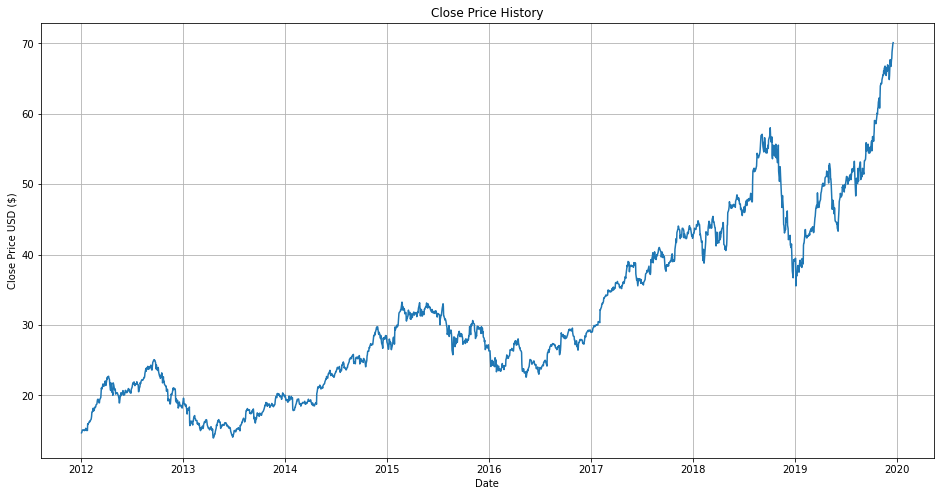

In [5]:
#  Visualise some close proce
plt.figure(figsize =(16,8))
plt.title('Close Price History')
plt.plot(apple['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.grid()

In [6]:
# Create df with close column 
data = apple.filter(['Close'])

# To np array
dataset = data.values

# Get no of rows 
# 80% of data
training_data_len = math.ceil(len(dataset) *0.8)

In [9]:
# Scale the data before fiving to neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [13]:
# create training dataset 
train_data = scaled_data[0:training_data_len, :]

# split to x and y 
x_train = []
y_train = []

for n in range(60, len(train_data)):
    x_train.append(train_data[n-60:n, 0])
    y_train.append(train_data[n, 0])
    if n <= 61: 
        print(x_train)
        print(y_train)
        print('----')


[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]
----
[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 

In [14]:
#Convert trains to np arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.shape

(1543, 60)

In [16]:
#reshape data 
#lstm excepts 3d data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1543, 60, 1)

In [18]:
# build model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# train epochs = iterations
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 27s 16ms/step - loss: 0.0020


In [28]:
# Create testing dataset 

# create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len -60:, :]

# Create the data sets 

x_test =[]
y_test = dataset[training_data_len:, :]

for n in range(60, len(test_data)):
    x_test.append(test_data[n-60:n, 0])

In [29]:
# convert data to np array 
x_test = np.array(x_test)

In [30]:
x_test.shape

(400, 60)

In [31]:
# reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
# Get model's predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
# evaluate model 
# get room mean squared error (RMSE) SD of residuals
# value of 0 means predictions were exact

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

3.669660349992731

<ipython-input-36-cd8146f47d60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


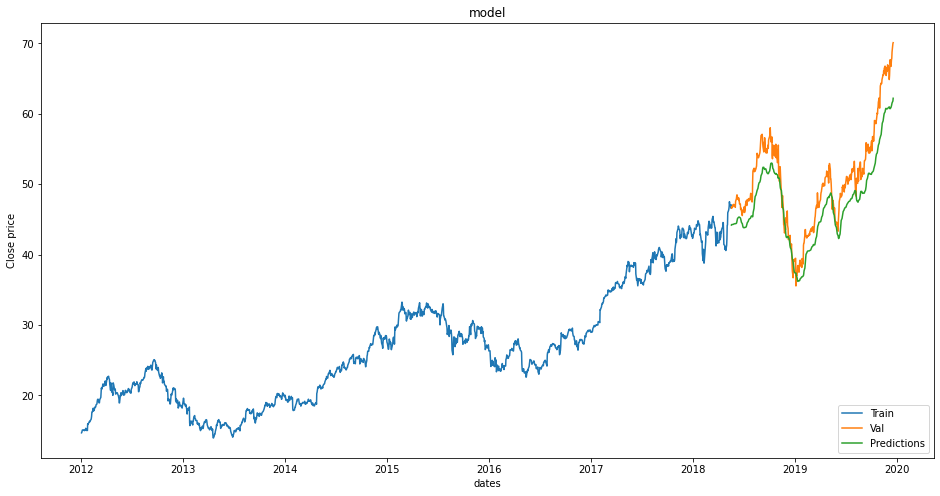

In [36]:
# Plot Data 

train = data[ :training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.xlabel('dates')
plt.ylabel('Close price')
plt.title('model')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()


In [37]:
# show actual and predicted close 
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,44.202572
2018-05-18,46.577499,44.269733
2018-05-21,46.907501,44.277267
2018-05-22,46.790001,44.286781
2018-05-23,47.090000,44.284576
...,...,...
2019-12-11,67.692497,61.150745
2019-12-12,67.864998,61.338894
2019-12-13,68.787498,61.541634


In [38]:
# predict closing price
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end = '2019-12-17')

df2 = apple_quote.filter(['Close'])

# get last 60 day closing 
last_60 = df2[-60:].values

#scale data 
last_60_scaled = scaler.transform(last_60)

X_test = []

X_test.append(last_60_scaled)

# convert test to a np array 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[62.616573]]


In [39]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end = '2019-12-18')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400,69.336212
